In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### SciKit-Learn:機器學習

#### pandas(資料清理)→numpy(科學計算)
#### →StatsModels 統計分析
####                                                               →SciKit-Learn 機器學習
####                                                               →Keras 人工智慧

## Overfitting

In [50]:
x = np.random.rand(6)
y = np.random.rand(6)

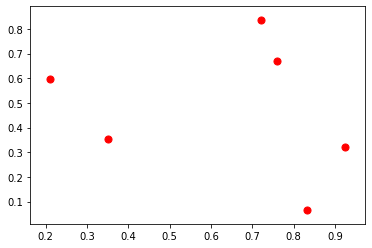

In [51]:
plt.scatter(x, y, c='r', s=50)

In [52]:
def myplot(n=1):
    plt.scatter(x, y ,c='r', s=50)
    t = np.linspace(-0.2, 1.2, 1000)
    plt.plot(t, 0.5*np.sin(n*t) +0.5)

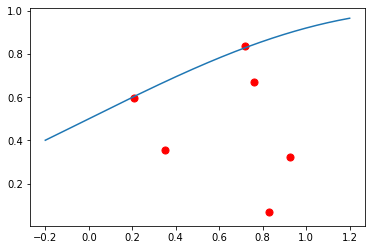

In [53]:
myplot(1)

In [54]:
from ipywidgets import interact

In [55]:
interact(myplot, n=(1,200))

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.myplot(n=1)>

## 線性迴歸

$$f(x)=1.2x+0.8+\varepsilon$$

In [97]:
x = np.linspace(0, 5, 200)
y = 1.2*x + 0.8 + 0.3*np.random.randn(200)

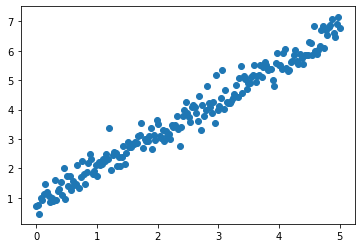

In [90]:
plt.scatter(x, y)

## 分訓練資料和測試資料

In [58]:
from sklearn.model_selection import train_test_split

### 小重點

機器學習（數據分析），輸入資料是
$$[x_1, x_2, x_3, ...]$$
喜歡放成
$$[[x_1], [x_2], [X_3], ...]$$
意思就是說本來n維向量，要變成nx1

In [59]:
x.shape

(200,)

In [98]:
x = x.reshape(200,1)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [101]:
len(x_train)

160

In [93]:
len(x_test)

40

## 準備做線性迴歸

#### 所有函數學習，包含線性迴歸、機器學習、神經網路都是做三部曲

#### 1.建一台函數學習機
#### 2.訓練
#### 3.預測

### step 1. 建函數學習機

In [64]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()  # model(自訂名稱) = ....

### step 2. 學習(訓練)

In [103]:
model.fit(x_train, y_train) 

#輸入:x_train 輸出:y_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### step 3. 預測

In [104]:
model.predict([[10]])

array([12.72898436])

In [105]:
model.predict([[10], [5]])

array([12.72898436,  6.74980809])

In [106]:
y_predict = model.predict(x_test)

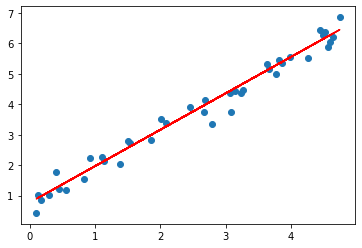

In [108]:
plt.scatter(x_test.ravel(), y_test)
plt.plot(x_test.ravel(), y_predict, "r")

## 房價預測

In [67]:
from sklearn.datasets import load_boston

In [68]:
boston_dataset = load_boston()

In [69]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [70]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [71]:
len(boston_dataset.feature_names)

13

In [72]:
boston_dataset.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [73]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [75]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [77]:
boston['MEDV']=boston_dataset.target  #target:看房價

In [79]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
import seaborn as sns

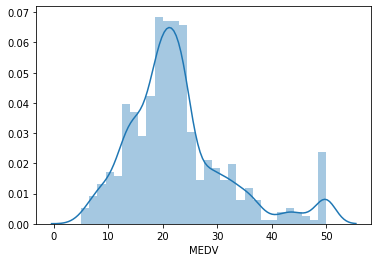

In [81]:
sns.distplot(boston.MEDV, bins = 30)

## 準備訓練資料

In [86]:
X = boston. iloc[:, 0:13].values
Y = boston.MEDV

In [87]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## 數據分析三部曲

### step 1. 開函數學習機

In [109]:
model = LinearRegression()

### step 2. 訓練

In [122]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### step 3. 預測

In [123]:
Y_predict = model.predict(X_test)

In [124]:
sns.set()  #代表以後的圖都套用sns

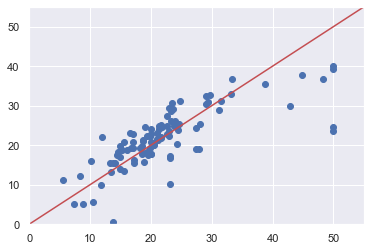

In [125]:
plt.scatter(Y_test, Y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55], [0,55], "r")

## [指定作業]
房價資料不用所有的feature去預測